# Data Cleaning

## 1. Imputing Missing Values

 Missing values, occur when no data value is stored for the variable in an observation. 
 
 The problem of missing data is relatively common in almost all research and can have a significant effect on the conclusions that can be drawn from the data, the lost data can cause bias in the estimation of parameters or it can also reduce the representativeness of the samples.

In [10]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset with error handling
try:
    data3 = pd.read_csv("fifa.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: fifa.csv not found. Ensure it's in the current directory.")
# Display first few rows and info
print(data3.head())
print(data3.info())  # Shows data types and non-null counts

Dataset loaded successfully.
   Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.pn

In [9]:
data3.dtypes

Unnamed: 0          int64
ID                  int64
Name               object
Age                 int64
Photo              object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 89, dtype: object

In [19]:
data3.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [13]:
data3.isnull().sum()

76984

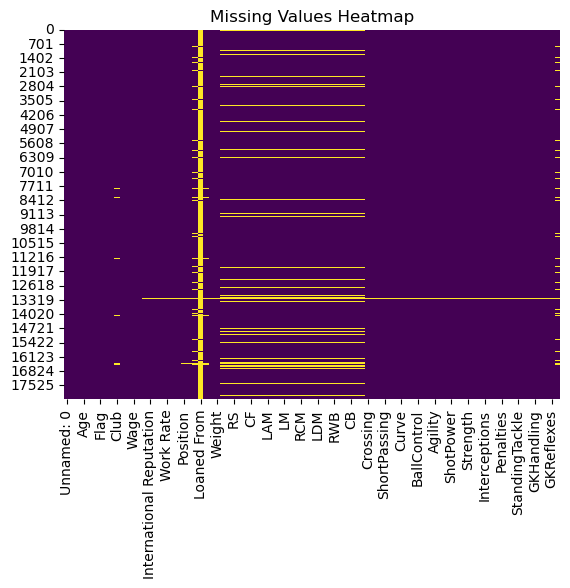

In [21]:
# Heatmap of missing values
sns.heatmap(data3.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [34]:
x=data3.isnull().sum()
y=(data3.isnull().sum()/data3.shape[0])*100
z={'Number of missing values':x,'Percentage of missing values':y}
df=pd.DataFrame(z,columns=['Number of missing values','Percentage of missing values'])
df.sort_values(by='Percentage of missing values',ascending=False)

,Number of missing values,Percentage of missing values
Loaned From,16943,93.057615
LWB,2085,11.451639
LCM,2085,11.451639
RS,2085,11.451639
LW,2085,11.451639
...,...,...
Nationality,0,0.000000
Photo,0,0.000000
Age,0,0.000000
Name,0,0.000000


In [25]:
# Drop columns with very high missing (>90%)
data = data3.drop(['Loaned From'], axis=1)  
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Contract Valid Until', 'Height', 'Weight',
       'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
       'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDivi

In [26]:
# Drop rows with >50 missing values (
print("Before dropping rows with >50 NaNs:", data.shape[0])
data = data[data.isnull().sum(axis=1) <= 50]
print("After dropping:", data.shape[0])

Before dropping rows with >50 NaNs: 18207
After dropping: 18159


In [35]:
# Heatmap of missing values again

In [30]:
# Identify columns with missing values
missing_cols = data.columns[data.isnull().any()]
missing_cols

Index(['Club', 'Position', 'Jersey Number', 'Joined', 'Contract Valid Until',
       'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
       'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'Release Clause'],
      dtype='object')

In [36]:
data.dtypes[data.isnull().any()]

Club                     object
Position                 object
Jersey Number           float64
Joined                   object
Contract Valid Until     object
LS                       object
ST                       object
RS                       object
LW                       object
LF                       object
CF                       object
RF                       object
RW                       object
LAM                      object
CAM                      object
RAM                      object
LM                       object
LCM                      object
CM                       object
RCM                      object
RM                       object
LWB                      object
LDM                      object
CDM                      object
RDM                      object
RWB                      object
LB                       object
LCB                      object
CB                       object
RCB                      object
RB                       object
Release 

In [37]:
# Technique 1: Mode for categorical/object columns
categorical_cols = ['Club', 'Position', 'Joined', 'Contract Valid Until']
for col in categorical_cols:
    if col in missing_cols:
        data[col] = data[col].fillna(data[col].mode()[0])
        print(f"Filled {col} with mode: {data[col].mode()[0]}")

Filled Club with mode: AS Monaco
Filled Position with mode: ST
Filled Joined with mode: Jul 1, 2018
Filled Contract Valid Until with mode: 2019


In [38]:
# Special handling for 'Jersey Number' (keep as float, fill with -1 )
if 'Jersey Number' in missing_cols:
    data['Jersey Number'] = data['Jersey Number'].fillna(-1)  # Sentinel value

In [39]:
data['Jersey Number']

0        10.0
1         7.0
2        10.0
3         1.0
4         7.0
         ... 
18202    22.0
18203    21.0
18204    33.0
18205    34.0
18206    33.0
Name: Jersey Number, Length: 18159, dtype: float64

In [40]:
data[['LS', 'ST', 'RS', 'LW']]

,LS,ST,RS,LW
0,88+2,88+2,88+2,92+2
1,91+3,91+3,91+3,89+3
2,84+3,84+3,84+3,89+3
3,NaN,NaN,NaN,NaN
4,82+3,82+3,82+3,87+3
...,...,...,...,...
18202,42+2,42+2,42+2,44+2
18203,45+2,45+2,45+2,39+2
18204,45+2,45+2,45+2,45+2
18205,47+2,47+2,47+2,47+2


In [43]:
# Technique 2: Fill with 0 for position ratings
position_ratings = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM',
                    'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
for col in position_ratings:
    if col in missing_cols:
        data[col] = data[col].fillna('0+0')  # Improved: Keep as string format for consistency

In [44]:
data[col]

0         59+2
1         61+3
2         60+3
3        0 + 0
4         73+3
         ...  
18202     45+2
18203     29+2
18204     33+2
18205     35+2
18206     46+2
Name: RB, Length: 18159, dtype: object

In [32]:
# Technique 3: Convert currency columns to numeric and impute with median (better than mode)
data['Release Clause']

0        €226.5M
1        €127.1M
2        €228.1M
3        €138.6M
4        €196.4M
          ...   
18202      €143K
18203      €113K
18204      €165K
18205      €143K
18206      €165K
Name: Release Clause, Length: 18159, dtype: object

In [33]:
def currency_to_num(value):
    if isinstance(value, str):
        value = value.replace('€', '').replace('K', 'e3').replace('M', 'e6')
        return float(value)
    return value

if 'Release Clause' in missing_cols:
    data['Release Clause'] = data['Release Clause'].apply(currency_to_num)  # Convert to numeric
    data['Release Clause'] = data['Release Clause'].fillna(data['Release Clause'].median())  # Median is robust to outliers
    print("Filled 'Release Clause' with median after conversion.")

Filled 'Release Clause' with median after conversion.


In [34]:
data['Release Clause']

0        226500000.0
1        127100000.0
2        228100000.0
3        138600000.0
4        196400000.0
            ...     
18202       143000.0
18203       113000.0
18204       165000.0
18205       143000.0
18206       165000.0
Name: Release Clause, Length: 18159, dtype: float64

In [57]:
#Technique 4: Mean/Median for numerical columns 
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
print(numerical_cols)
for col in numerical_cols:
    if data[col].isnull().sum() > 0:
        data[col] = data[col].fillna(data[col].median())  # Median for skewed data; use mean() for normal dist

Index(['Unnamed: 0', 'ID', 'Age', 'Overall', 'Potential', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')


In [38]:
data[col].isnull().sum()

0

In [39]:
# Technique 5: Forward/Backward Fill (useful if data is sorted, e.g., by 'Age' or date)
data['Joined']

0         Jul 1, 2004
1        Jul 10, 2018
2         Aug 3, 2017
3         Jul 1, 2011
4        Aug 30, 2015
             ...     
18202     May 3, 2017
18203    Mar 19, 2018
18204     Jul 1, 2017
18205    Apr 24, 2018
18206    Oct 30, 2018
Name: Joined, Length: 18159, dtype: object

In [46]:
data['Joined'].isnull().sum()

0

In [48]:
data = data.sort_values('Joined')  # Assume 'Joined' is date-ordered
  # Forward then backward fill

In [49]:
data = data.fillna(method='ffill')

C:\Users\ASIM\AppData\Local\Temp\ipykernel_552\917065080.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


In [47]:
data = data.fillna('bfill')

In [59]:
# Technique 7: KNN Imputer (Learning-based or ml based, for numerical data)

In [60]:
# Final check
print("Total remaining NaNs:", data.isnull().sum().sum())

Total remaining NaNs: 0
